In [12]:
import torch
import numpy as np
from torch import optim
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
from sklearn.model_selection import train_test_split
from tqdm import trange
from pytorch_utils import FramesDataset, MinMaxNorm, ToTensor
from NN import CNN

# Data loading and preparation

In [13]:
train_dataset = FramesDataset(im_dir="./images/X_train_snr1.npy", 
                           moments_dir="./moments/moments_train.npy",
                           locs_dir="./locations/locs_train.npy",
                           transform = transforms.Compose([MinMaxNorm(), ToTensor()]))

train_data, val_data = train_test_split(train_dataset, test_size=0.2, shuffle=True, random_state=100)

# Dataloader creation
batch_size = 256
test_batch_size = 1
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

del train_dataset
del train_data

# Training

In [19]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CNN().to(device)
count_epoch = 0
n_epochs = 200
criterion = torch.nn.MSELoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
history_train, history_test = np.ones(n_epochs), np.ones(n_epochs)

In [20]:
accuracy =  100
for epoch in trange(n_epochs-1):
    model.train()
    train_loss = 0
    count_epoch += 1
    for data in train_loader:
        image, target = data["image"].to(device), data["target"].to(device)
        y_pred = model(image)
        loss = criterion(y_pred, target)
        train_loss += loss.detach()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()      
    history_train[count_epoch] = train_loss / len(train_loader) 
    model.eval()
    valid_loss = 0.0
    for data in val_loader:
        image, target = data["image"].to(device), data["target"].to(device)
        y_pred = model(image)
        loss = criterion(y_pred,target)
        valid_loss += loss.detach()
    history_test[count_epoch] = valid_loss / len(val_loader)
    if history_test[count_epoch] < accuracy:
        accuracy = history_test[count_epoch]
        ind = count_epoch
        torch.save(model.state_dict(), './checkpoints/NN')
    print(f"Epoch: {epoch}, Loss = {history_train[count_epoch]:.5f}, val_loss = {history_test[count_epoch]:.5f}")

  1%|          | 1/199 [00:05<17:39,  5.35s/it]

Epoch: 0, Loss = 0.06167, val_loss = 0.05136


  1%|          | 2/199 [00:10<17:30,  5.33s/it]

Epoch: 1, Loss = 0.03862, val_loss = 0.03858


  2%|▏         | 3/199 [00:16<17:24,  5.33s/it]

Epoch: 2, Loss = 0.02939, val_loss = 0.03133


  2%|▏         | 4/199 [00:21<17:07,  5.27s/it]

Epoch: 3, Loss = 0.02353, val_loss = 0.03246


  3%|▎         | 5/199 [00:26<17:06,  5.29s/it]

Epoch: 4, Loss = 0.02064, val_loss = 0.02538


  3%|▎         | 6/199 [00:31<16:54,  5.25s/it]

Epoch: 5, Loss = 0.01817, val_loss = 0.03015


  4%|▎         | 7/199 [00:37<16:53,  5.28s/it]

Epoch: 6, Loss = 0.01617, val_loss = 0.02435


  4%|▍         | 8/199 [00:42<16:51,  5.29s/it]

Epoch: 7, Loss = 0.01493, val_loss = 0.02001


  5%|▍         | 9/199 [00:47<16:39,  5.26s/it]

Epoch: 8, Loss = 0.01375, val_loss = 0.02313


  5%|▌         | 10/199 [00:52<16:38,  5.28s/it]

Epoch: 9, Loss = 0.01271, val_loss = 0.01719


  6%|▌         | 11/199 [00:58<16:24,  5.24s/it]

Epoch: 10, Loss = 0.01190, val_loss = 0.01886


  6%|▌         | 12/199 [01:03<16:14,  5.21s/it]

Epoch: 11, Loss = 0.01129, val_loss = 0.01904


  7%|▋         | 13/199 [01:08<16:05,  5.19s/it]

Epoch: 12, Loss = 0.01060, val_loss = 0.01777


  7%|▋         | 14/199 [01:13<15:57,  5.18s/it]

Epoch: 13, Loss = 0.01004, val_loss = 0.01806


  8%|▊         | 15/199 [01:18<15:58,  5.21s/it]

Epoch: 14, Loss = 0.00953, val_loss = 0.01565


  8%|▊         | 16/199 [01:24<15:59,  5.24s/it]

Epoch: 15, Loss = 0.00888, val_loss = 0.01540


  9%|▊         | 17/199 [01:29<15:57,  5.26s/it]

Epoch: 16, Loss = 0.00850, val_loss = 0.01526


  9%|▉         | 18/199 [01:34<15:46,  5.23s/it]

Epoch: 17, Loss = 0.00806, val_loss = 0.01690


 10%|▉         | 19/199 [01:39<15:37,  5.21s/it]

Epoch: 18, Loss = 0.00763, val_loss = 0.01754


 10%|█         | 20/199 [01:44<15:29,  5.19s/it]

Epoch: 19, Loss = 0.00738, val_loss = 0.01557


 11%|█         | 21/199 [01:50<15:30,  5.23s/it]

Epoch: 20, Loss = 0.00696, val_loss = 0.01455


 11%|█         | 22/199 [01:55<15:21,  5.21s/it]

Epoch: 21, Loss = 0.00668, val_loss = 0.01793


 12%|█▏        | 23/199 [02:00<15:13,  5.19s/it]

Epoch: 22, Loss = 0.00632, val_loss = 0.01886


 12%|█▏        | 24/199 [02:05<15:07,  5.18s/it]

Epoch: 23, Loss = 0.00603, val_loss = 0.01764


 13%|█▎        | 25/199 [02:10<15:00,  5.18s/it]

Epoch: 24, Loss = 0.00585, val_loss = 0.01547


 13%|█▎        | 26/199 [02:15<14:54,  5.17s/it]

Epoch: 25, Loss = 0.00568, val_loss = 0.01475


 14%|█▎        | 27/199 [02:21<14:48,  5.17s/it]

Epoch: 26, Loss = 0.00527, val_loss = 0.01459


 14%|█▍        | 28/199 [02:26<14:43,  5.17s/it]

Epoch: 27, Loss = 0.00502, val_loss = 0.01641


 15%|█▍        | 29/199 [02:31<14:37,  5.16s/it]

Epoch: 28, Loss = 0.00484, val_loss = 0.01620


 15%|█▌        | 30/199 [02:36<14:32,  5.16s/it]

Epoch: 29, Loss = 0.00470, val_loss = 0.01547


 16%|█▌        | 31/199 [02:41<14:26,  5.16s/it]

Epoch: 30, Loss = 0.00455, val_loss = 0.01635


 16%|█▌        | 32/199 [02:46<14:20,  5.15s/it]

Epoch: 31, Loss = 0.00436, val_loss = 0.01528


 17%|█▋        | 33/199 [02:52<14:15,  5.15s/it]

Epoch: 32, Loss = 0.00429, val_loss = 0.01552


 17%|█▋        | 34/199 [02:57<14:16,  5.19s/it]

Epoch: 33, Loss = 0.00408, val_loss = 0.01444


 18%|█▊        | 35/199 [03:02<14:09,  5.18s/it]

Epoch: 34, Loss = 0.00393, val_loss = 0.01455


 18%|█▊        | 36/199 [03:07<14:09,  5.21s/it]

Epoch: 35, Loss = 0.00388, val_loss = 0.01396


 19%|█▊        | 37/199 [03:12<14:01,  5.19s/it]

Epoch: 36, Loss = 0.00370, val_loss = 0.01477


 19%|█▉        | 38/199 [03:18<13:53,  5.18s/it]

Epoch: 37, Loss = 0.00354, val_loss = 0.01535


 20%|█▉        | 39/199 [03:23<13:47,  5.17s/it]

Epoch: 38, Loss = 0.00354, val_loss = 0.01575


 20%|██        | 40/199 [03:28<13:40,  5.16s/it]

Epoch: 39, Loss = 0.00340, val_loss = 0.01686


 21%|██        | 41/199 [03:33<13:34,  5.16s/it]

Epoch: 40, Loss = 0.00332, val_loss = 0.01548


 21%|██        | 42/199 [03:38<13:29,  5.15s/it]

Epoch: 41, Loss = 0.00316, val_loss = 0.01412


 22%|██▏       | 43/199 [03:43<13:23,  5.15s/it]

Epoch: 42, Loss = 0.00316, val_loss = 0.01503


 22%|██▏       | 44/199 [03:49<13:24,  5.19s/it]

Epoch: 43, Loss = 0.00308, val_loss = 0.01383


 23%|██▎       | 45/199 [03:54<13:17,  5.18s/it]

Epoch: 44, Loss = 0.00301, val_loss = 0.01554


 23%|██▎       | 46/199 [03:59<13:10,  5.17s/it]

Epoch: 45, Loss = 0.00293, val_loss = 0.01436


 24%|██▎       | 47/199 [04:04<13:04,  5.16s/it]

Epoch: 46, Loss = 0.00296, val_loss = 0.01605


 24%|██▍       | 48/199 [04:09<12:58,  5.16s/it]

Epoch: 47, Loss = 0.00276, val_loss = 0.01414


 25%|██▍       | 49/199 [04:14<12:52,  5.15s/it]

Epoch: 48, Loss = 0.00269, val_loss = 0.01524


 25%|██▌       | 50/199 [04:19<12:47,  5.15s/it]

Epoch: 49, Loss = 0.00269, val_loss = 0.01609


 26%|██▌       | 51/199 [04:25<12:41,  5.15s/it]

Epoch: 50, Loss = 0.00257, val_loss = 0.01470


 26%|██▌       | 52/199 [04:30<12:36,  5.15s/it]

Epoch: 51, Loss = 0.00257, val_loss = 0.01461


 27%|██▋       | 53/199 [04:35<12:31,  5.15s/it]

Epoch: 52, Loss = 0.00265, val_loss = 0.01436


 27%|██▋       | 54/199 [04:40<12:26,  5.15s/it]

Epoch: 53, Loss = 0.00249, val_loss = 0.01399


 28%|██▊       | 55/199 [04:45<12:20,  5.15s/it]

Epoch: 54, Loss = 0.00235, val_loss = 0.01677


 28%|██▊       | 56/199 [04:50<12:15,  5.15s/it]

Epoch: 55, Loss = 0.00233, val_loss = 0.01413


 29%|██▊       | 57/199 [04:55<12:10,  5.15s/it]

Epoch: 56, Loss = 0.00233, val_loss = 0.01563


 29%|██▉       | 58/199 [05:01<12:05,  5.14s/it]

Epoch: 57, Loss = 0.00235, val_loss = 0.01586


 30%|██▉       | 59/199 [05:06<12:00,  5.15s/it]

Epoch: 58, Loss = 0.00225, val_loss = 0.01447


 30%|███       | 60/199 [05:11<11:55,  5.14s/it]

Epoch: 59, Loss = 0.00223, val_loss = 0.01517


 31%|███       | 61/199 [05:16<11:49,  5.14s/it]

Epoch: 60, Loss = 0.00216, val_loss = 0.01443


 31%|███       | 62/199 [05:21<11:44,  5.14s/it]

Epoch: 61, Loss = 0.00211, val_loss = 0.01422


 32%|███▏      | 63/199 [05:26<11:39,  5.15s/it]

Epoch: 62, Loss = 0.00212, val_loss = 0.01918


 32%|███▏      | 64/199 [05:31<11:34,  5.15s/it]

Epoch: 63, Loss = 0.00215, val_loss = 0.01434


 33%|███▎      | 65/199 [05:37<11:29,  5.15s/it]

Epoch: 64, Loss = 0.00214, val_loss = 0.01467


 33%|███▎      | 66/199 [05:42<11:24,  5.15s/it]

Epoch: 65, Loss = 0.00211, val_loss = 0.01563


 34%|███▎      | 67/199 [05:47<11:19,  5.15s/it]

Epoch: 66, Loss = 0.00205, val_loss = 0.01497


 34%|███▍      | 68/199 [05:52<11:14,  5.15s/it]

Epoch: 67, Loss = 0.00200, val_loss = 0.01434


 35%|███▍      | 69/199 [05:57<11:08,  5.15s/it]

Epoch: 68, Loss = 0.00186, val_loss = 0.01430


 35%|███▌      | 70/199 [06:02<11:03,  5.15s/it]

Epoch: 69, Loss = 0.00188, val_loss = 0.01429


 36%|███▌      | 71/199 [06:07<10:58,  5.15s/it]

Epoch: 70, Loss = 0.00187, val_loss = 0.01533


 36%|███▌      | 72/199 [06:13<10:53,  5.14s/it]

Epoch: 71, Loss = 0.00183, val_loss = 0.01448


 37%|███▋      | 73/199 [06:18<10:48,  5.14s/it]

Epoch: 72, Loss = 0.00184, val_loss = 0.01422


 37%|███▋      | 74/199 [06:23<10:43,  5.15s/it]

Epoch: 73, Loss = 0.00176, val_loss = 0.01455


 38%|███▊      | 75/199 [06:28<10:37,  5.15s/it]

Epoch: 74, Loss = 0.00180, val_loss = 0.01457


 38%|███▊      | 76/199 [06:33<10:32,  5.15s/it]

Epoch: 75, Loss = 0.00183, val_loss = 0.01487


 39%|███▊      | 77/199 [06:38<10:27,  5.15s/it]

Epoch: 76, Loss = 0.00183, val_loss = 0.01467


 39%|███▉      | 78/199 [06:43<10:22,  5.15s/it]

Epoch: 77, Loss = 0.00191, val_loss = 0.01522


 40%|███▉      | 79/199 [06:49<10:17,  5.15s/it]

Epoch: 78, Loss = 0.00181, val_loss = 0.01491


 40%|████      | 80/199 [06:54<10:12,  5.15s/it]

Epoch: 79, Loss = 0.00160, val_loss = 0.01443


 41%|████      | 81/199 [06:59<10:07,  5.15s/it]

Epoch: 80, Loss = 0.00159, val_loss = 0.01680


 41%|████      | 82/199 [07:04<10:01,  5.15s/it]

Epoch: 81, Loss = 0.00156, val_loss = 0.01504


 42%|████▏     | 83/199 [07:09<09:56,  5.15s/it]

Epoch: 82, Loss = 0.00162, val_loss = 0.01598


 42%|████▏     | 84/199 [07:14<09:51,  5.15s/it]

Epoch: 83, Loss = 0.00170, val_loss = 0.01537


 43%|████▎     | 85/199 [07:19<09:46,  5.15s/it]

Epoch: 84, Loss = 0.00166, val_loss = 0.01439


 43%|████▎     | 86/199 [07:25<09:41,  5.15s/it]

Epoch: 85, Loss = 0.00155, val_loss = 0.01433


 44%|████▎     | 87/199 [07:30<09:36,  5.15s/it]

Epoch: 86, Loss = 0.00151, val_loss = 0.01558


 44%|████▍     | 88/199 [07:35<09:31,  5.15s/it]

Epoch: 87, Loss = 0.00150, val_loss = 0.01392


 45%|████▍     | 89/199 [07:40<09:25,  5.15s/it]

Epoch: 88, Loss = 0.00144, val_loss = 0.01433


 45%|████▌     | 90/199 [07:45<09:20,  5.15s/it]

Epoch: 89, Loss = 0.00158, val_loss = 0.01470


 46%|████▌     | 91/199 [07:50<09:15,  5.15s/it]

Epoch: 90, Loss = 0.00154, val_loss = 0.01430


 46%|████▌     | 92/199 [07:55<09:10,  5.15s/it]

Epoch: 91, Loss = 0.00166, val_loss = 0.01452


 47%|████▋     | 93/199 [08:01<09:05,  5.14s/it]

Epoch: 92, Loss = 0.00144, val_loss = 0.01497


 47%|████▋     | 94/199 [08:06<09:00,  5.15s/it]

Epoch: 93, Loss = 0.00147, val_loss = 0.01507


 48%|████▊     | 95/199 [08:11<08:55,  5.15s/it]

Epoch: 94, Loss = 0.00140, val_loss = 0.01491


 48%|████▊     | 96/199 [08:16<08:49,  5.14s/it]

Epoch: 95, Loss = 0.00143, val_loss = 0.01478


 49%|████▊     | 97/199 [08:21<08:44,  5.14s/it]

Epoch: 96, Loss = 0.00133, val_loss = 0.01486


 49%|████▉     | 98/199 [08:26<08:39,  5.14s/it]

Epoch: 97, Loss = 0.00139, val_loss = 0.01391


 50%|████▉     | 99/199 [08:32<08:34,  5.14s/it]

Epoch: 98, Loss = 0.00133, val_loss = 0.01419


 50%|█████     | 100/199 [08:37<08:29,  5.14s/it]

Epoch: 99, Loss = 0.00137, val_loss = 0.01396


 51%|█████     | 101/199 [08:42<08:24,  5.14s/it]

Epoch: 100, Loss = 0.00183, val_loss = 0.01505


 51%|█████▏    | 102/199 [08:47<08:19,  5.14s/it]

Epoch: 101, Loss = 0.00147, val_loss = 0.01477


 52%|█████▏    | 103/199 [08:52<08:18,  5.19s/it]

Epoch: 102, Loss = 0.00127, val_loss = 0.01382


 52%|█████▏    | 104/199 [08:57<08:11,  5.17s/it]

Epoch: 103, Loss = 0.00118, val_loss = 0.01402


 53%|█████▎    | 105/199 [09:03<08:05,  5.17s/it]

Epoch: 104, Loss = 0.00120, val_loss = 0.01417


 53%|█████▎    | 106/199 [09:08<07:59,  5.16s/it]

Epoch: 105, Loss = 0.00117, val_loss = 0.01553


 54%|█████▍    | 107/199 [09:13<07:54,  5.16s/it]

Epoch: 106, Loss = 0.00118, val_loss = 0.01466


 54%|█████▍    | 108/199 [09:18<07:48,  5.15s/it]

Epoch: 107, Loss = 0.00118, val_loss = 0.01396


 55%|█████▍    | 109/199 [09:23<07:43,  5.15s/it]

Epoch: 108, Loss = 0.00132, val_loss = 0.01414


 55%|█████▌    | 110/199 [09:28<07:38,  5.15s/it]

Epoch: 109, Loss = 0.00127, val_loss = 0.01539


 56%|█████▌    | 111/199 [09:33<07:32,  5.15s/it]

Epoch: 110, Loss = 0.00139, val_loss = 0.01456


 56%|█████▋    | 112/199 [09:39<07:27,  5.15s/it]

Epoch: 111, Loss = 0.00131, val_loss = 0.01425


 57%|█████▋    | 113/199 [09:44<07:22,  5.15s/it]

Epoch: 112, Loss = 0.00126, val_loss = 0.01512


 57%|█████▋    | 114/199 [09:49<07:17,  5.15s/it]

Epoch: 113, Loss = 0.00117, val_loss = 0.01394


 58%|█████▊    | 115/199 [09:54<07:12,  5.15s/it]

Epoch: 114, Loss = 0.00118, val_loss = 0.01420


 58%|█████▊    | 116/199 [09:59<07:07,  5.15s/it]

Epoch: 115, Loss = 0.00122, val_loss = 0.01466


 59%|█████▉    | 117/199 [10:04<07:01,  5.15s/it]

Epoch: 116, Loss = 0.00117, val_loss = 0.01460


 59%|█████▉    | 118/199 [10:09<06:56,  5.15s/it]

Epoch: 117, Loss = 0.00114, val_loss = 0.01420


 60%|█████▉    | 119/199 [10:15<06:51,  5.15s/it]

Epoch: 118, Loss = 0.00111, val_loss = 0.01438


 60%|██████    | 120/199 [10:20<06:46,  5.15s/it]

Epoch: 119, Loss = 0.00111, val_loss = 0.01445


 61%|██████    | 121/199 [10:25<06:41,  5.15s/it]

Epoch: 120, Loss = 0.00112, val_loss = 0.01626


 61%|██████▏   | 122/199 [10:30<06:36,  5.15s/it]

Epoch: 121, Loss = 0.00114, val_loss = 0.01449


 62%|██████▏   | 123/199 [10:35<06:31,  5.15s/it]

Epoch: 122, Loss = 0.00113, val_loss = 0.01484


 62%|██████▏   | 124/199 [10:40<06:25,  5.15s/it]

Epoch: 123, Loss = 0.00109, val_loss = 0.01422


 63%|██████▎   | 125/199 [10:45<06:20,  5.14s/it]

Epoch: 124, Loss = 0.00110, val_loss = 0.01418


 63%|██████▎   | 126/199 [10:51<06:15,  5.14s/it]

Epoch: 125, Loss = 0.00107, val_loss = 0.01460


 64%|██████▍   | 127/199 [10:56<06:10,  5.15s/it]

Epoch: 126, Loss = 0.00117, val_loss = 0.01445


 64%|██████▍   | 128/199 [11:01<06:05,  5.15s/it]

Epoch: 127, Loss = 0.00113, val_loss = 0.01457


 65%|██████▍   | 129/199 [11:06<06:00,  5.15s/it]

Epoch: 128, Loss = 0.00106, val_loss = 0.01449


 65%|██████▌   | 130/199 [11:11<05:55,  5.15s/it]

Epoch: 129, Loss = 0.00105, val_loss = 0.01413


 66%|██████▌   | 131/199 [11:16<05:49,  5.15s/it]

Epoch: 130, Loss = 0.00097, val_loss = 0.01437


 66%|██████▋   | 132/199 [11:21<05:44,  5.15s/it]

Epoch: 131, Loss = 0.00107, val_loss = 0.01457


 67%|██████▋   | 133/199 [11:27<05:39,  5.15s/it]

Epoch: 132, Loss = 0.00103, val_loss = 0.01480


 67%|██████▋   | 134/199 [11:32<05:34,  5.15s/it]

Epoch: 133, Loss = 0.00108, val_loss = 0.01620


 68%|██████▊   | 135/199 [11:37<05:29,  5.15s/it]

Epoch: 134, Loss = 0.00123, val_loss = 0.01485


 68%|██████▊   | 136/199 [11:42<05:24,  5.14s/it]

Epoch: 135, Loss = 0.00111, val_loss = 0.01428


 69%|██████▉   | 137/199 [11:47<05:18,  5.15s/it]

Epoch: 136, Loss = 0.00132, val_loss = 0.01484


 69%|██████▉   | 138/199 [11:52<05:13,  5.14s/it]

Epoch: 137, Loss = 0.00108, val_loss = 0.01510


 70%|██████▉   | 139/199 [11:57<05:08,  5.14s/it]

Epoch: 138, Loss = 0.00092, val_loss = 0.01413


 70%|███████   | 140/199 [12:03<05:03,  5.14s/it]

Epoch: 139, Loss = 0.00086, val_loss = 0.01463


 71%|███████   | 141/199 [12:08<04:58,  5.15s/it]

Epoch: 140, Loss = 0.00092, val_loss = 0.01499


 71%|███████▏  | 142/199 [12:13<04:53,  5.14s/it]

Epoch: 141, Loss = 0.00093, val_loss = 0.01401


 72%|███████▏  | 143/199 [12:18<04:48,  5.14s/it]

Epoch: 142, Loss = 0.00098, val_loss = 0.01445


 72%|███████▏  | 144/199 [12:23<04:42,  5.14s/it]

Epoch: 143, Loss = 0.00095, val_loss = 0.01425


 73%|███████▎  | 145/199 [12:28<04:37,  5.15s/it]

Epoch: 144, Loss = 0.00095, val_loss = 0.01461


 73%|███████▎  | 146/199 [12:33<04:32,  5.15s/it]

Epoch: 145, Loss = 0.00089, val_loss = 0.01414


 74%|███████▍  | 147/199 [12:39<04:27,  5.15s/it]

Epoch: 146, Loss = 0.00088, val_loss = 0.01432


 74%|███████▍  | 148/199 [12:44<04:22,  5.15s/it]

Epoch: 147, Loss = 0.00093, val_loss = 0.01479


 75%|███████▍  | 149/199 [12:49<04:17,  5.15s/it]

Epoch: 148, Loss = 0.00103, val_loss = 0.01421


 75%|███████▌  | 150/199 [12:54<04:12,  5.15s/it]

Epoch: 149, Loss = 0.00091, val_loss = 0.01450


 76%|███████▌  | 151/199 [12:59<04:06,  5.15s/it]

Epoch: 150, Loss = 0.00098, val_loss = 0.01501


 76%|███████▋  | 152/199 [13:04<04:01,  5.15s/it]

Epoch: 151, Loss = 0.00093, val_loss = 0.01462


 77%|███████▋  | 153/199 [13:09<03:56,  5.15s/it]

Epoch: 152, Loss = 0.00093, val_loss = 0.01501


 77%|███████▋  | 154/199 [13:15<03:51,  5.15s/it]

Epoch: 153, Loss = 0.00096, val_loss = 0.01464


 78%|███████▊  | 155/199 [13:20<03:46,  5.15s/it]

Epoch: 154, Loss = 0.00093, val_loss = 0.01456


 78%|███████▊  | 156/199 [13:25<03:41,  5.15s/it]

Epoch: 155, Loss = 0.00086, val_loss = 0.01423


 79%|███████▉  | 157/199 [13:30<03:36,  5.14s/it]

Epoch: 156, Loss = 0.00085, val_loss = 0.01491


 79%|███████▉  | 158/199 [13:35<03:30,  5.14s/it]

Epoch: 157, Loss = 0.00086, val_loss = 0.01500


 80%|███████▉  | 159/199 [13:40<03:25,  5.14s/it]

Epoch: 158, Loss = 0.00093, val_loss = 0.01490


 80%|████████  | 160/199 [13:46<03:20,  5.14s/it]

Epoch: 159, Loss = 0.00092, val_loss = 0.01437


 81%|████████  | 161/199 [13:51<03:15,  5.14s/it]

Epoch: 160, Loss = 0.00085, val_loss = 0.01458


 81%|████████▏ | 162/199 [13:56<03:10,  5.15s/it]

Epoch: 161, Loss = 0.00088, val_loss = 0.01569


 82%|████████▏ | 163/199 [14:01<03:05,  5.14s/it]

Epoch: 162, Loss = 0.00096, val_loss = 0.01442


 82%|████████▏ | 164/199 [14:06<03:00,  5.15s/it]

Epoch: 163, Loss = 0.00085, val_loss = 0.01407


 83%|████████▎ | 165/199 [14:11<02:54,  5.15s/it]

Epoch: 164, Loss = 0.00075, val_loss = 0.01422


 83%|████████▎ | 166/199 [14:16<02:49,  5.15s/it]

Epoch: 165, Loss = 0.00084, val_loss = 0.01529


 84%|████████▍ | 167/199 [14:22<02:44,  5.15s/it]

Epoch: 166, Loss = 0.00088, val_loss = 0.01470


 84%|████████▍ | 168/199 [14:27<02:39,  5.14s/it]

Epoch: 167, Loss = 0.00083, val_loss = 0.01439


 85%|████████▍ | 169/199 [14:32<02:34,  5.15s/it]

Epoch: 168, Loss = 0.00088, val_loss = 0.01458


 85%|████████▌ | 170/199 [14:37<02:29,  5.14s/it]

Epoch: 169, Loss = 0.00076, val_loss = 0.01455


 86%|████████▌ | 171/199 [14:42<02:24,  5.15s/it]

Epoch: 170, Loss = 0.00082, val_loss = 0.01437


 86%|████████▋ | 172/199 [14:47<02:18,  5.15s/it]

Epoch: 171, Loss = 0.00082, val_loss = 0.01487


 87%|████████▋ | 173/199 [14:52<02:13,  5.15s/it]

Epoch: 172, Loss = 0.00082, val_loss = 0.01452


 87%|████████▋ | 174/199 [14:58<02:08,  5.15s/it]

Epoch: 173, Loss = 0.00083, val_loss = 0.01446


 88%|████████▊ | 175/199 [15:03<02:03,  5.14s/it]

Epoch: 174, Loss = 0.00085, val_loss = 0.01441


 88%|████████▊ | 176/199 [15:08<01:58,  5.15s/it]

Epoch: 175, Loss = 0.00079, val_loss = 0.01505


 89%|████████▉ | 177/199 [15:13<01:53,  5.14s/it]

Epoch: 176, Loss = 0.00081, val_loss = 0.01451


 89%|████████▉ | 178/199 [15:18<01:48,  5.15s/it]

Epoch: 177, Loss = 0.00079, val_loss = 0.01435


 90%|████████▉ | 179/199 [15:23<01:42,  5.15s/it]

Epoch: 178, Loss = 0.00081, val_loss = 0.01471


 90%|█████████ | 180/199 [15:28<01:37,  5.15s/it]

Epoch: 179, Loss = 0.00081, val_loss = 0.01443


 91%|█████████ | 181/199 [15:34<01:32,  5.15s/it]

Epoch: 180, Loss = 0.00079, val_loss = 0.01440


 91%|█████████▏| 182/199 [15:39<01:27,  5.14s/it]

Epoch: 181, Loss = 0.00076, val_loss = 0.01452


 92%|█████████▏| 183/199 [15:44<01:22,  5.15s/it]

Epoch: 182, Loss = 0.00075, val_loss = 0.01521


 92%|█████████▏| 184/199 [15:49<01:17,  5.15s/it]

Epoch: 183, Loss = 0.00083, val_loss = 0.01479


 93%|█████████▎| 185/199 [15:54<01:12,  5.15s/it]

Epoch: 184, Loss = 0.00083, val_loss = 0.01472


 93%|█████████▎| 186/199 [15:59<01:06,  5.14s/it]

Epoch: 185, Loss = 0.00075, val_loss = 0.01419


 94%|█████████▍| 187/199 [16:04<01:01,  5.14s/it]

Epoch: 186, Loss = 0.00072, val_loss = 0.01576


 94%|█████████▍| 188/199 [16:10<00:56,  5.15s/it]

Epoch: 187, Loss = 0.00079, val_loss = 0.01555


 95%|█████████▍| 189/199 [16:15<00:51,  5.15s/it]

Epoch: 188, Loss = 0.00075, val_loss = 0.01504


 95%|█████████▌| 190/199 [16:20<00:46,  5.15s/it]

Epoch: 189, Loss = 0.00077, val_loss = 0.01528


 96%|█████████▌| 191/199 [16:25<00:41,  5.15s/it]

Epoch: 190, Loss = 0.00080, val_loss = 0.01466


 96%|█████████▋| 192/199 [16:30<00:36,  5.15s/it]

Epoch: 191, Loss = 0.00080, val_loss = 0.01429


 97%|█████████▋| 193/199 [16:35<00:30,  5.15s/it]

Epoch: 192, Loss = 0.00077, val_loss = 0.01606


 97%|█████████▋| 194/199 [16:40<00:25,  5.15s/it]

Epoch: 193, Loss = 0.00072, val_loss = 0.01416


 98%|█████████▊| 195/199 [16:46<00:20,  5.15s/it]

Epoch: 194, Loss = 0.00069, val_loss = 0.01444


 98%|█████████▊| 196/199 [16:51<00:15,  5.14s/it]

Epoch: 195, Loss = 0.00073, val_loss = 0.01438


 99%|█████████▉| 197/199 [16:56<00:10,  5.14s/it]

Epoch: 196, Loss = 0.00069, val_loss = 0.01483


 99%|█████████▉| 198/199 [17:01<00:05,  5.14s/it]

Epoch: 197, Loss = 0.00071, val_loss = 0.01519


100%|██████████| 199/199 [17:06<00:00,  5.16s/it]

Epoch: 198, Loss = 0.00071, val_loss = 0.01480


train_loss = 0.001271
validation_loss = 0.013818


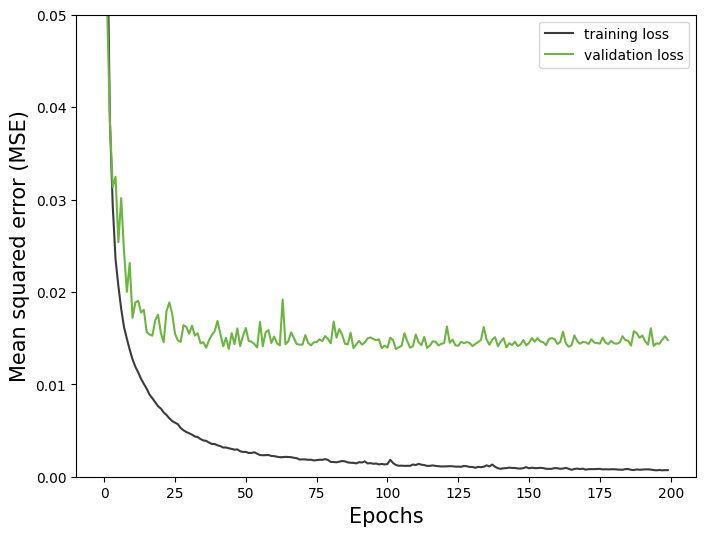

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
plt.plot(history_train, label='training loss', c='#3c3c3b')
plt.plot(history_test, label='validation loss',c='#6bb640')

plt.ylim(0,0.05)
plt.ylabel('Mean squared error (MSE)', size=15)
plt.xlabel('Epochs', size=15)
plt.legend();
print(f'train_loss = {history_train[ind]:.6f}')
print(f'validation_loss = {history_test[ind]:.6f}')

# Testing

In [38]:
model = CNN().to(device)
model.load_state_dict(torch.load('./checkpoints/NN'))

<All keys matched successfully>

In [42]:
test_dataset = FramesDataset(im_dir="./images/X_test_real_snr1to2.npy", 
                           moments_dir="./moments/moments_test.npy",
                           locs_dir="./locations/locs_test.npy",
                           transform = transforms.Compose([MinMaxNorm(), ToTensor()]))

test_loader = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=False)

In [43]:
from pyrocko import moment_tensor as pmt
from scipy.spatial.distance import cdist

def calc_kagan_angle(moment1, moment2):
    kagan = pmt.kagan_angle(pmt.as_mt(moment1), pmt.as_mt(moment2))
    return kagan

def calc_distance(coords1, coords2):
    distance = cdist(coords1.detach().cpu().numpy()[None]*40*20, coords2.detach().cpu().numpy()[None]*40*20)
    return distance[0][0]

def transform(moment, minmax):
    a, b = minmax
    a, b = a.detach().cpu().numpy(), b.detach().cpu().numpy()
    moment = moment.detach().cpu().numpy()
    moment_transformed = moment * (b - a) + a
    return moment_transformed
    
kagan_angles = []
distances = []
model.eval()
with torch.no_grad():
    for data in test_loader:
        image, target, minmax = data["image"].to(device), data["target"].to(device), data["minmax"]
        true_moment, true_coords = transform(target[0][:6], minmax), target[0][6:]
        
        predict = model(image)
        pred_moment, pred_coords = transform(predict[0][:6], minmax), predict[0][6:]
        kagan_angles.append(calc_kagan_angle(true_moment, pred_moment))
        distances.append(calc_distance(true_coords, pred_coords))
kagan_angles = np.array(kagan_angles)
distances = np.array(distances)
print("kagan < 30", kagan_angles[kagan_angles < 30].shape[0] / 20000) # 20000 is a number of samples in test data
print("kagan < 50", kagan_angles[kagan_angles < 50].shape[0] / 20000) 
print("dist < 20", distances[distances < 20].shape[0] / 20000) 
print("dist < 40", distances[distances < 40].shape[0] / 20000) 

kagan < 30 0.5351
kagan < 50 0.7083
dist < 20 0.58335
dist < 40 0.79025
